# Ejercicio sobre contenidos de los vinos

Vamos a hacer un analisis de los datos relevados a tres clases de vinos cultivados en la misma region de Italia.

Las tres clases de vinos fueron sometidas analisis quimicos, donde se midieron un total de 13 caracteristicas.

## Datos

Los datos crudos se pueden descargar de https://archive.ics.uci.edu/ml/datasets/wine

En este ejercicio se utilizaran datos que ya han sido procesados y limpiados a partir de los datos crudos.

**Archivo de datos:** 'datos_vinos_limpios.csv'

## Objetivo

Crear un modelo lineal que estime la Clase de un vino a partir de sus caracteristicas quimicas.

## Procedimiento General

1. Librerias y Datos
    1. Importar librerias
    2. Importar Datos
    3. Revisar Datos
2. Modelar
    1. Seleccionar variables y objetivo
    2. Train-test split
    4. Modelo Lineal
    5. Ver resultado del RMSE
3. Validar modelo con cross-validation
4. Estimar la Clase de 3 vinos desconocidos

-----

## Librerias y Datos

1) Importar las librerias necesarias:
    - pandas
    - LinearRegression (para armar un modelo lineal)
    - train_test_split (para particionar los datos)
    - Mean Squared Error (para luego calcular RMSE)

In [1]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

2) Leer los datos de los vinos

In [2]:
vinos = pd.read_csv('./datos_vinos_limpios.csv')

In [3]:
vinos.head(3)

,Clase,Alcohol,Malic.acid,Ash,Alcalinity.of.ash,Magnesium,Total.phenols,Flavanoids,Nonflavanoid.phenols,Proanthocyanins,Color.intensity,Hue,OD280.OD315.of.diluted.wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185


3) Nunca asumir que los datos estan limpios. Revisar:
    - tipo de datos (KNN requiere todas las columnas numericas salvo la clasificacion)

In [5]:
vinos.isnull().sum()

Clase                           0
Alcohol                         0
Malic.acid                      0
Ash                             0
Alcalinity.of.ash               0
Magnesium                       0
Total.phenols                   0
Flavanoids                      0
Nonflavanoid.phenols            0
Proanthocyanins                 0
Color.intensity                 0
Hue                             0
OD280.OD315.of.diluted.wines    0
Proline                         0
dtype: int64

    - que no haya nulos

Obs: *Si hay que limpiar, conviene hacerlo en otro notebook y guardar datos limpios en otro csv para luego cargar aca*

## Modelo

### Seleccionar variables y objetivo
Vamos a utilizar la columna 'Clase' como `objetivo` y las columnas restantes como `datos` del modelo

4. Crear `datos` (todas menos 'Clase') y `objetivo` (columna 'Clase')

In [7]:
X = vinos.drop('Clase', axis=1)
y = vinos['Clase']

### Separar datos en train y test

5. Separar `datos` y `objetivo` en dos conjuntos de entrenamiento y prueba (Googlear: *test train split python*).
    
    Utilizar:
    - test_size: 25%
    - random_state: 111

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=111)

### Modelo Multilineal
Ahora si, comencemos a armar un modelo multilineal. En este caso la Clase se la considerara una variable numerica continua.

6. Crear el modelo usando:
    - `LinearRegression`
    - guardarlo en la variable `modelo`

In [11]:
modelo = LinearRegression()

7. Y ahora hacer el fit con los datos y objetivo de entrenamiento. Usar:
    - `.fit()`
    - `datos_entrenamiento`
    - `objetivo_entrenamiento`
    - no hace falta asignarlo a una variable

In [12]:
modelo.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

-----
### El modelo esta listo!
-----
### Validacion
Ahora que tenemos el modelo listo, tenemos que validarlo con los datos y objetivo de prueba.

Como es un modelo de regresion lineal, los resultados son numeros continuos. En este caso no podemos armar una matriz de confusion. Lo que si podemos hacer es visualizar en un grafico los valores predecidos vs los valores reales. De esta manera podremos ver si el modelo se confunde de clase o no.

#### Prediccion
8. Predecir la clase resultante para los datos de prueba. Usar:
    - `.predict(data)`
    - `modelo`
    - `datos de prueba`
    - guardarlo en `objetivo_prediccion`

In [13]:
y_predict = modelo.predict(X_test)

9. Calcular el Root Mean Square Error (RMSE)
    - Si esta bien calculado deberia dar 0.27 (para random_state = 111)

In [17]:
import numpy as np
rmse = np.sqrt(mean_squared_error(y_test, y_predict))
print('RMSE: ', format(rmse, '.3f'))

RMSE:  0.270


#### Matriz de confusion
Se puede hacer una matriz de confusion? Un modelo lineal devuelve un resultado numerico flotante y no entero. Como es posible entonces realizar una matriz de confusion que requiere dos categorias?  En este caso lo que se puede hacer es catalogar la salida del modelo en numeros enteros usando el metodo `.round()`

11. Mostrar la matriz de confusion entre los objetivos de prueba y prediccion.

In [18]:
pd.crosstab( y_test, y_predict.round(), rownames=['Real'], colnames=['Predicho'], margins=True)

Predicho,1.0,2.0,3.0,All
Real,,,,
1,13,2,0,15
2,1,16,0,17
3,0,0,13,13
All,14,18,13,45


#### Visualizacion de Resultados

10. Podemos visualizar como resultaron las predicciones en funcion del valor real. Para hacer esto:
    - importar matplotlib
    - Hacer un plot de prediccion vs real

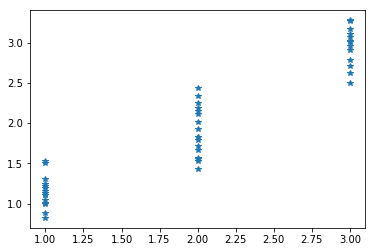

In [33]:
import matplotlib.pyplot as plt
fig = plt.figure()

plt.plot(y_test, y_predict,'*')

Tambien se puede hacer un boxplot para ver si hay superposicion en la Clase estimada

Text(0, 0.5, 'Clase Estimada')

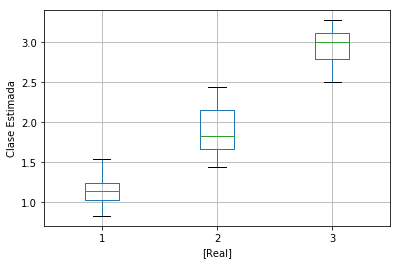

In [25]:
temp = pd.DataFrame({'Clase Estimada': y_predict, 'Real': y_test})
bp = temp.boxplot(by='Real')
bp.get_figure().suptitle('')
bp.get_figure().gca().set_title("")
bp.get_figure().gca().set_ylabel("Clase Estimada")

------

## Cross Validation

Ahora vamos a hacer una validacion del modelo lineal usando cross validation (**K-Fold validation**).

11. Importar las librerias para evaluar cross validation
    - cross_val_score
    - metrics

In [27]:
from sklearn.model_selection import cross_val_score

12. Crear el modelo (mismo codigo que en el paso 7.)

In [28]:
modelo = LinearRegression()

13. Evaluar los scores con `cross_val_score()`. Sus parametros son:
    - modelo
    - datos
    - cv: grupos para el cross-validation (K-Fold). Usar 5 grupos.
    - scoring: funcion de scoring (usar: 'neg_mean_squared_error')

In [30]:
scores = cross_val_score(modelo, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
for score in scores:
    print('Score: ', -score)

Score:  0.11336567764498043
Score:  0.052409654374639986
Score:  0.08376146409929894
Score:  0.07530696937246179
Score:  0.0829529692085467


-------

## Modelo final

In [31]:
vinos = pd.read_csv('./datos_vinos_limpios.csv') 
datos = vinos.drop(['Clase'], axis=1)
objetivo = vinos['Clase']
modelo = modelo.fit(X_train, y_train)

Cargar los datos de nuevos vinos ('Vinos_desconocidos.csv') y estimar la Clase con el modelo

In [32]:
vinos_nuevos = pd.read_csv('vinos_desconocidos.csv')
modelo.predict(vinos_nuevos)

array([0.92340107, 2.06253705, 3.08492304])

Si todo salio bien, los resultados deberian ser `array([0.92349069, 2.15183315, 3.05271663])`